In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import glob

In [21]:
path = 'D:/MyData/GreyAtom/Python/Jupyter/pract_data/data/data//facebook_logs//facebook_login_logout_logs'
column_names = ['username','date','time','action']
data = pd.read_table(path, delimiter=',', header=None, names=column_names)
data

,username,date,time,action
0,mehul.chopra@neebal.com,2015-03-01,4:30,in
1,narendra.modi@yahoo.com,2015-03-01,4:35,out
2,katrina.kaif@gmail.com,2015-03-01,4:36,out
3,mehul.chopra@neebal.com,2015-03-01,4:45,out
4,narendra.modi@yahoo.com,2015-03-01,4:50,out
5,mehul.chopra@neebal.com,2015-03-02,5:30,out
6,mehul.chopra@neebal.com,2015-03-02,5:45,out
7,mehul.chopra@neebal.com,2015-03-02,6:00,in
8,mehul.chopra@neebal.com,2015-03-02,7:30,out
9,katrina.kaif@gmail.com,2015-03-02,18:00,out


In [24]:
p_data = data[data['action'] == 'out']#we use data[data] to pass the true values in data.
#if its only data['action'] == 'out', it would give us a series of boolean values.
p_data

,username,date,time,action
1,narendra.modi@yahoo.com,2015-03-01,4:35,out
2,katrina.kaif@gmail.com,2015-03-01,4:36,out
3,mehul.chopra@neebal.com,2015-03-01,4:45,out
4,narendra.modi@yahoo.com,2015-03-01,4:50,out
5,mehul.chopra@neebal.com,2015-03-02,5:30,out
6,mehul.chopra@neebal.com,2015-03-02,5:45,out
8,mehul.chopra@neebal.com,2015-03-02,7:30,out
9,katrina.kaif@gmail.com,2015-03-02,18:00,out
10,narendra.modi@yahoo.com,2015-03-03,10:30,out
11,narendra.modi@yahoo.com,2015-03-03,10:45,out


In [27]:
out_group = p_data.groupby('username')
out_group['action'].count()



username
katrina.kaif@gmail.com     3
mehul.chopra@neebal.com    4
narendra.modi@yahoo.com    6
Name: action, dtype: int64

In [29]:
pivot_out_data = p_data.pivot_table('action', aggfunc=np.count_nonzero, index='username')
pivot_out_data

,action
username,
katrina.kaif@gmail.com,3
mehul.chopra@neebal.com,4
narendra.modi@yahoo.com,6


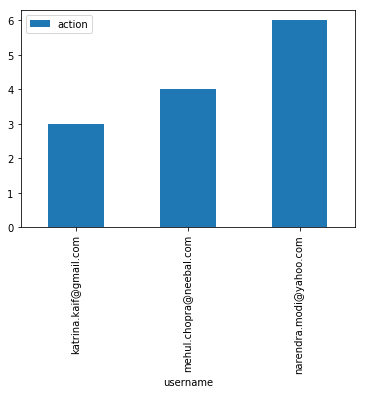

In [30]:
pivot_out_data.plot(kind='bar')
plt.show()

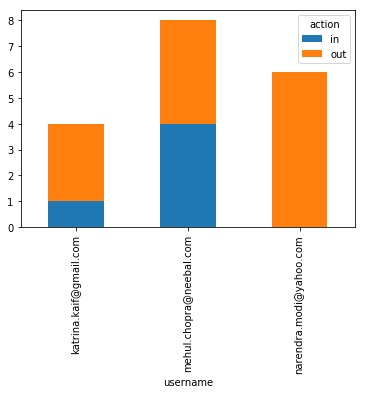

In [66]:
in_out_data = data.groupby(['username','action'])
in_out_plot = in_out_data['username'].count()
in_out_plot.unstack().plot(kind='bar', stacked=True)
plt.show()

In [52]:
data['count'] = 1
ins_out = data[['username', 'action', 'count']]
username_action = ins_out.pivot_table('count', aggfunc=np.sum, index='username', columns='action')
username_action


action,in,out
username,,
katrina.kaif@gmail.com,1.0,3.0
mehul.chopra@neebal.com,4.0,4.0
narendra.modi@yahoo.com,NaN,6.0


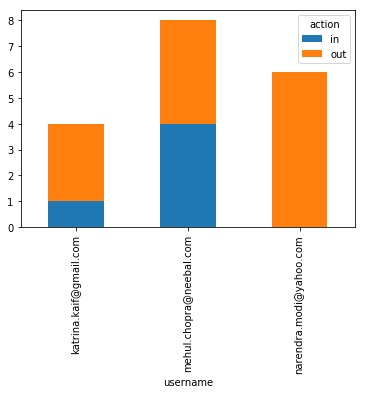

In [57]:
c_username_action = username_action.fillna(0)#fill na as 0
c_username_action.plot(kind='bar', stacked=True)
plt.show()
